In [8]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as T

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline

import timeit
import json
import cv2, random

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image
    
def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [16]:
Joints = json.load(open("Dataset/annotation.json","r"))
names = Joints.keys()
print names

[u'007_1499_L', u'072_2297_L', u'066_1175_L', u'028_389_R', u'026_2063_R', u'038_1673_R', u'136_2045_L', u'041_653_L', u'026_2063_L', u'066_1175_R', u'028_389_L', u'072_2297_R', u'115_893_L', u'126_941_R', u'136_1505_R', u'126_941_L', u'136_1505_L', u'090_539_R', u'063_2189_R', u'115_893_R', u'051_983_L', u'064_707_R', u'092_1307_L', u'039_587_R', u'131_491_L', u'029_1553_L', u'025_2621_R', u'005_419_L', u'122_1913_R', u'063_581_L', u'005_419_R', u'122_1913_L', u'131_491_R', u'092_1307_R', u'110_1727_L', u'091_1517_L', u'086_17_R', u'085_29_L', u'045_1349_R', u'043_2051_L', u'022_1757_R', u'022_1757_L', u'053_359_L', u'045_1349_L', u'043_2051_R', u'085_29_R', u'099_2309_R', u'086_17_L', u'091_1517_R', u'130_1493_L', u'082_2207_R', u'034_2195_L', u'124_641_R', u'060_1775_R', u'074_1739_R', u'043_95_R', u'043_95_L', u'017_593_R', u'074_1739_L', u'034_2195_R', u'124_641_L', u'046_1265_R', u'121_779_R', u'010_1349_L', u'116_1799_L', u'037_2261_R', u'116_1043_L', u'065_401_L', u'065_401_R',

TypeError: img is not a numpy array, neither a scalar

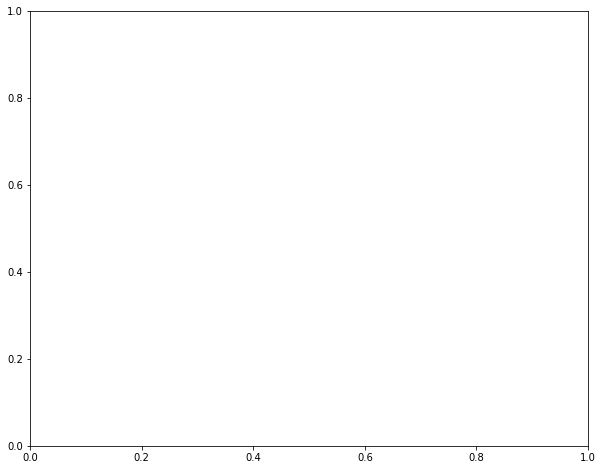

In [18]:
import show

fig, ax = plt.subplots(1,1,figsize=(10,8))
show.draw_hand(ax, Joints['105_2891_R'])
plt.show()


In [ ]:
from cs175.features import color_histogram_hsv, hog_feature

def load_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs175/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()